<a href="https://colab.research.google.com/github/vinayk19/Assignment/blob/master/Softmax_mnist2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn, optim, cuda
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot 
import torch.nn.functional as F
import time
import matplotlib.pyplot as plt

In [0]:
from torchvision import datasets, transforms

In [0]:
# train_dataset = datasets.MNIST(root='./mnist_data/',
#                                train=True,
#                                transform=transforms.ToTensor(),
#                                download=True)


MNIST dataset (Train and Test)

In [4]:
train_dataset = datasets.MNIST(root= 'MNIST/processed/training.pt',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)


Extracting MNIST/processed/training.pt/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/processed/training.pt/MNIST/raw


Extracting MNIST/processed/training.pt/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/processed/training.pt/MNIST/raw




Extracting MNIST/processed/training.pt/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/processed/training.pt/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [5]:
print(train_dataset.__len__())
# train_dataset.__getitem__(4)[:3].__len__()

train_dataset[2].__len__() 

60000


2

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

UsageError: unrecognized arguments: # Only use this if using iPython


In [0]:
doc(Dataset.__getitem__)

In [0]:
# test_dataset = datasets.MNIST(root= 'MNIST/processed/test.pt',
#                                train=False,
#                                transform=transforms.ToTensor(),
#                                download=True)

In [0]:
help(datasets)

Data loader (input pipelines)

In [0]:
bs = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=bs, shuffle = True)
# it will give op as batch_idx, data & target
test_loader = DataLoader(dataset= test_dataset, batch_size= bs, shuffle = True)

how to view image from Dataloader
1. using Next funciton

In [0]:
# images, labels = next(iter(train_loader)) # we have used the next funciton
images, labels = next(iter(train_loader))

### based on type find method avalible in that data type in that liberary  example tuple, int str etc in 
python, or torch.tensor in torch, ndarray in numpy etc. So go in that liberary and search  method (shape in torch or len or ..) shape is not documented in torch it is equivalent to size() 

In [63]:
x = labels
print(type(x)) 
print(x.shape)
print(x[2])
# print(x)

<class 'enumerate'>


AttributeError: ignored

In [0]:
print(images.shape )
plt.imshow(images[3].reshape(28,28), cmap="gray")

2. using enumerate funciton after dataLoader

In [0]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [94]:
# x = examples # here class is enumerate(builtins) which do not have shape method () so changing it to next one
x = next(examples) # here class is tuple. as it comes aftr applying next to enumerate which(tuple) also not have shape method () 
print(type(x)) 
# print(x.shape)  # is tuple do not have shape in it len
print(x.__len__())
# print(x[1][0]) # note tuple is not taking [0][0] and [0][1] it providing output [1][0], [1][1] why
print(x[1][1])

# print(x)

<class 'tuple'>
2
tensor([1, 9, 9, 0, 2, 3, 0, 1, 3, 6, 5, 7, 4, 4, 8, 1, 1, 0, 1, 6, 8, 8, 0, 0,
        3, 6, 2, 5, 7, 8, 9, 2, 6, 6, 4, 3, 4, 2, 2, 9, 7, 6, 0, 4, 4, 3, 4, 5,
        8, 7, 1, 7, 1, 6, 5, 5, 1, 1, 8, 4, 0, 3, 1, 1])


In [73]:
x.__len__()

2

Plotting of n =6 picsb

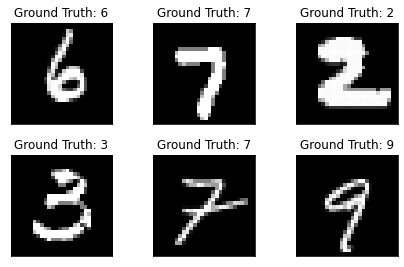

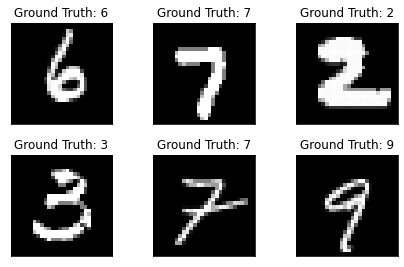

In [60]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [0]:
?

Q  how to see  access  data sample
2. Check sample fun model and get the output
3  what is test.eval
4. check cmmand insiude test and train function..

In [7]:
device = 'cuda' if cuda.is_available() else 'cpu'
print(f'Trainng Minist model on {device}\n {"=" * 44}')

Trainng Minist model on cuda


In [0]:
class mnist(nn.Module):
  def __init__(self):
    super(mnist, self).__init__()
    self.l1 = nn.Linear(784, 520) #28*28 =784
    self.l2 = nn.Linear(520, 320)
    self.l3 = nn.Linear(320, 240)
    self.l4 = nn.Linear(240, 120)
    self.l5 = nn.Linear(120, 10)
    # self.softmax = F.softmax()
    # self.sigmoid = F.sigmoid()
    # self.relu = F.relu()

  def forward(self, data):
    # make image flat(n,1,28,28) then n*784 to layere1
    # x = data.reshape(1, 784)
    x= data.view(-1, 784)
    f1= F.relu(self.l1(x))
    f1= F.relu(self.l2(f1))
    f1= F.relu(self.l3(f1))
    f1= F.relu(self.l4(f1))
    # logit= self.relu(self.l5(f1))
    logit = self.l5(f1)
    return logit # is it required to have activation or not ans no



In [9]:
model = mnist()
model.to(device)

mnist(
  (l1): Linear(in_features=784, out_features=520, bias=True)
  (l2): Linear(in_features=520, out_features=320, bias=True)
  (l3): Linear(in_features=320, out_features=240, bias=True)
  (l4): Linear(in_features=240, out_features=120, bias=True)
  (l5): Linear(in_features=120, out_features=10, bias=True)
)

criterion and OPtimizer

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=.01, momentum =0.5)

Trainingdef

In [0]:
def train(epoch):
  model.train()
  for Epoch in range(5):
    for batch_idx, (data, target) in enumerate(train_loader):
      data, target = data.to(device), target.to(device)
      optimizer.zero_grad()
      logit = model(data)
      loss = criterion(logit, target)
      loss.backward()
      optimizer.step()
      if batch_idx % 100  == 0:
        # print('Train Epoch: {} | Batch Status: {}/{} ({:.0f}% | Loss: {:.6f}', format(
        #     epoch, batch_idx*len(data), len(train_loader.dataset), 100. *batch_idx / len(train_loader), loss.item()
        # ))
        print('Train Epoch: {} | Batch Status: {}/{} ({:.0f}%) | Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        



Testing

In [0]:
def test():
  model.eval()
  test_loss =0
  correct = 0
  for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)
    #sum up the match loss
    test_loss += criterion(output, target).item()
    #get the index of the max value
    pred = output.data.max(1, keepdim=True)[1]
    correct += pred.eq(target.data.view_as(pred)).cpu().sum()

  test_loss /= len(test_loader.dataset)
  print(f'===========================\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} '
          f'({100. * correct / len(test_loader.dataset):.0f}%)')
  # print(f'====================\n test set : Average loss: {test_loss: .4f}, Accuracy: {correct}/{len(test_loader.dataset)} ' 
          # f'({100. * correct/len(test_loader.dataset):. 0f}%)')
          
#         ===========================
# Test set: Average loss: 0.0016, Accuracy: 9787/10000 (98%)
# Testing timr: 0m 25s


NameError: ignored

In [21]:
output.data.max(1, keepdim=True)

NameError: ignored

In [20]:
if __name__ == '__main__':
  since = time.time()
  for epoch in range(1,10):
    epoch_start = time.time()
    train(epoch)
    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Training timr: {m:.0f}m {s:.0f}s')
    test()
    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Testing timr: {m:.0f}m {s:.0f}s')
  m, s = divmod(time.time() - since, 60)
  print(f'Total Time: {m:.0f}m {s:.0f}s\nModel was trained on {device}!')

Train Epoch: 1 | Batch Status: 0/60000 (0%) | Loss: 0.046235
Train Epoch: 1 | Batch Status: 640/60000 (1%) | Loss: 0.023272
Train Epoch: 1 | Batch Status: 1280/60000 (2%) | Loss: 0.036968
Train Epoch: 1 | Batch Status: 1920/60000 (3%) | Loss: 0.015955
Train Epoch: 1 | Batch Status: 2560/60000 (4%) | Loss: 0.007177
Train Epoch: 1 | Batch Status: 3200/60000 (5%) | Loss: 0.066021
Train Epoch: 1 | Batch Status: 3840/60000 (6%) | Loss: 0.006087
Train Epoch: 1 | Batch Status: 4480/60000 (7%) | Loss: 0.021526
Train Epoch: 1 | Batch Status: 5120/60000 (9%) | Loss: 0.028489
Train Epoch: 1 | Batch Status: 5760/60000 (10%) | Loss: 0.007404
Train Epoch: 1 | Batch Status: 6400/60000 (11%) | Loss: 0.041731
Train Epoch: 1 | Batch Status: 7040/60000 (12%) | Loss: 0.028157
Train Epoch: 1 | Batch Status: 7680/60000 (13%) | Loss: 0.018989
Train Epoch: 1 | Batch Status: 8320/60000 (14%) | Loss: 0.029946
Train Epoch: 1 | Batch Status: 8960/60000 (15%) | Loss: 0.031282
Train Epoch: 1 | Batch Status: 9600/60